# Visualizing and identifying distributions



An important part of exploratory data analysis is to identify the distributions of available data. Different types of visualization can be used depending on the type of data to be analyzed.

## Visualizing discrete data

A discrete variable has countable values, such as the number of months in a year, the number of students in a school, the number of objects in a list, etc. In this way, each possible value of the variable can be associated with a non-zero probability.

Discrete data distributions are often analyzed from frequency counts of possible values. The most direct example is **histograms**, which we have seen before.

As we discussed, histograms are especially useful when the feature under analysis has few possible values. This is not usually the case when we want to analyze the most frequent terms in documents, for example.

A more interesting option in this case is **word clouds**. In a word cloud, the terms that are most frequent are highlighted (appearing in more central positions and in larger sizes).

In Python, we can use the word cloud library in conjunction with the matplotlib library to generate a word cloud:


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### A simple word cloud

We will start using an artificial example so we can focus on the library use.

In [ ]:
text="Natal Calor Sol Quente Calor Praia IMD IMD Calor Natal Tecnologia Digital Tecnologia Praia Praia Sol Verão Verão Verão Calor Calor Quente Quente Quente Quente IMD Sol Sol Calor Calor Calor Calor Digital IMD Verão Praia Praia Litoral Litoral Praia Calor Sol IMD Quente Vulcão"

The word cloud is created in two steps.

First, we use the `WordCloud` object from the `wordcloud` library, which allows us to give some parameters like height, width, and background color.

In [ ]:
wordcloud = WordCloud(width=550, height=550, background_color="white").generate(text)

Then, we use the method `imshow` from the `matplotlib` library to visualize the produced cloud.

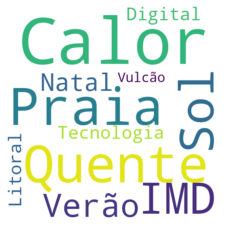

In [ ]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Some little technical details of the above code:

-  The parameter **interpolation** is used to improve the image quality
```python
plt.imshow(wordcloud, interpolation='bilinear')
```
- Since matplotlib is generally used to generate mathematical graphs, we need to specify that we don't want axes to be generated for our word cloud:
```python
plt.axis("off")
```
- The final render is made by the `show` method from the `matplotlib` library:
```python
plt.show()
```


### A word cloud in the real world

In terms of libraries and methods, the example shown above is really close to the ones that we use on the daily routine of document analysis. However, we need to pay attention to the concepts of **stopwords** and **corpus** when we deal with real texts.

Let’s see an example that shows that. This fragment was taken from the introduction of the Wikipedia page about Natal-RN:


In [ ]:
text="""
        Natal é um município brasileiro, capital do estado do Rio Grande do Norte, na Região Nordeste do país. Com uma área de aproximadamente 167 km², é a segunda capital brasileira com a menor área territorial e a sexta maior capital do país em densidade populacional, distando 2 227 quilômetros de Brasília, a capital federal.
        Fundada em 1599, às margens do Rio Potenji, conta com importantes monumentos, parques e museus e pontos turísticos, como o Teatro Alberto Maranhão e a Coluna Capitolina Del Pretti, no Centro Histórico, além de outras atrações, entre elas a Ponte Newton Navarro, o Museu Câmara Cascudo, o Parque da Cidade Dom Nivaldo Monte, o Museu de Cultura Popular, o Parque das Dunas, a Catedral Metropolitana e praias como Ponta Negra e dos Artistas, e eventos de grande repercussão, tais como a Feira Internacional de Artesanato (FIART), o Carnatal, as festas juninas e as comemorações natalinas.
        Historicamente, a cidade teve grande importância durante a Segunda Guerra Mundial em 1942 durante a Operação Tocha, já que os aviões da base aliada americana se abasteciam com combustível no lugar onde durante muito tempo foi o Aeroporto Internacional Augusto Severo, sendo classificada como "um dos quatro pontos mais estratégicos do mundo". Devido às operações da primeira base de foguetes da América do Sul, no Centro de Lançamento da Barreira do Inferno, hoje localizada no município limítrofe de Parnamirim, Natal também passou a ser conhecida como a "Capital Espacial do Brasil". A capital potiguar foi também uma das doze sedes da Copa do Mundo de 2014.
        De acordo com a estimativa realizada pelo Instituto Brasileiro de Geografia e Estatística (IBGE) em 2018, a população do município é de 877 640 habitantes, sendo o décimo nono município mais populoso do país e sua região metropolitana, formada por outros treze municípios do Rio Grande do Norte, possui uma população de pouco mais de 1,5 milhão de habitantes, formando a quinta maior aglomeração urbana do Nordeste e a décima nona do Brasil.
        """

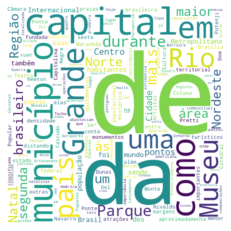

In [ ]:
wordcloud = WordCloud(width=550, height=550, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In real texts, it’s pretty common that the most frequent terms are the least relevant terms, like articles or prepositions. In the **Natural Language Processing** (NLP) field, these terms are known as stopwords.

In general, stopwords are provided by NLP libraries as part of a corpus, i.e., a database in a certain language built from a collection of documents.

In Python, the main NLP libraries are `nltk` and `spacy`. Next, we’ll see an example using `nltk`.
First, we need to download the collection of stopwords from the library:

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

When the download is complete, we can choose the language that we want to work with. In this case, we’ll select portuguese which is the language used in Wikipedia’s text about Natal-RN:


In [ ]:
from nltk.corpus import stopwords
stopwords_pt = stopwords.words("portuguese")

Now, we can generate a Word Cloud like we did before, but in this case we’ll add the parameter `stopwords` to the `WordCloud` object:

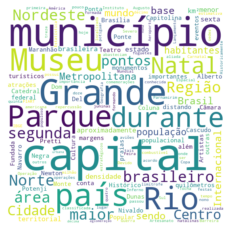

In [ ]:
wordcloud = WordCloud(width=550, height=550, background_color="white", stopwords=stopwords_pt).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see that the highlighted terms are the ones that describe, in the best way, Natal-RN in Wikipedia’s text.

Looking at the word cloud, we can notice that some similar terms like “Rio Grande do Norte” and “Região Nordeste” are separated. This kind of analysis requires the use of n-gram, which you can look for in tutorials about `nltk` =)


## Visualizing continuous data


When we want to analyze continuous data, we can:
- use representations that apply some discretization to the data
- use representations appropriate to continuous data


The main example of discrete visualization is histogram, as we’ve seen before. Now, for continuous visualization, we can use density plots, which we also already talked about.  Whatever the kind of visualization adopted, the essential thing is to identify the type of distribution presented and how to proceed  in each case.

### Main kinds of distribution

In previous notebooks, we've discussed a little bit about normal and bimodal distributions. Here, we will discuss quickly about two other kinds of common distributions, which are: **uniform** and **exponential**.

#### Uniform Distribution

In this kind of distribution, all the possible values in a dice have an equal chance to occur. This kind of distribution is more common in theory then in practice, so let's create an artificial example using the `arange` method fom the `numpy` library.

This method generates a list of values with uniform probability. In the following example, we generate values between 0 and 10, using five decimal places of precision.

In [ ]:
import numpy as np
s = np.arange(10, step=0.00001)

In order to visualize the data distribution, let's use the method `distplot` from the `seaborn` library, which produces both a histogram and a density plot. In the example shown below, we limit the graphic interval to the values between 1 and 2.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(1.0, 2.0)

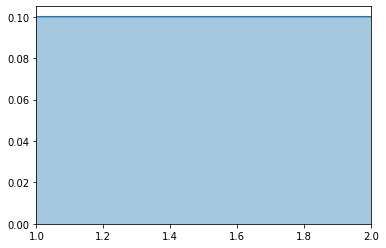

In [ ]:
import seaborn as sns
sns.distplot(s)
plt.xlim(1,2)

Note that the density function is a line, indicating that each possible value presents the same probability of occurrence.

#### Exponential Distribution

In an exponential distribution, the most frequent values occur with an exponentialy greater probability than less frequent values. This distribution can be observed, for example, as we analize the brazilian cities' population. Let's initially load an estimate provided by the TCU (Federal Court of Accounts) for the year of 2019:


In [ ]:
import pandas as pd

In [ ]:
ibge = pd.read_csv("https://raw.githubusercontent.com/leobezerra/pandas-zero/master/datasets/estimativa_TCU_2019_20191031_limpa.csv", header=0, sep=",", thousands=",")

In [ ]:
ibge.head()

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO ESTIMADA
0,RO,11.0,15.0,Alta Floresta D'Oeste,22945
1,RO,11.0,23.0,Ariquemes,107863
2,RO,11.0,31.0,Cabixi,5312
3,RO,11.0,49.0,Cacoal,85359
4,RO,11.0,56.0,Cerejeiras,16323


For our analysis, what matters for us is to visualize the distribution of the `"POPULAÇÃO ESTIMADA"` (estimated population) feature:

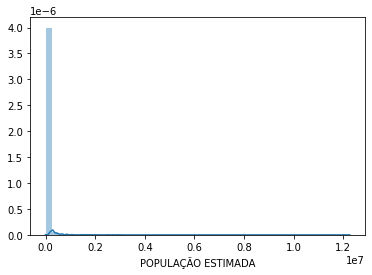

In [ ]:
sns.distplot(ibge["POPULAÇÃO ESTIMADA"])

Note that the visualization of the graphic is really hard, because of the diference between the frequencies. A way to deal with an exponential distribution is a logarithmic transformation of the data. In practice, it means that the measurement will now be presented in a logarithmic scale:  


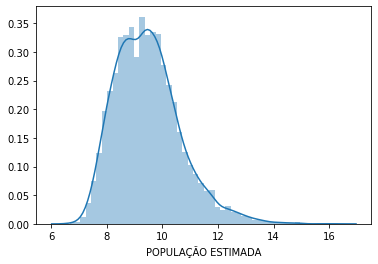

In [ ]:
ibge_log = np.log(ibge["POPULAÇÃO ESTIMADA"])
sns.distplot(ibge_log)

### Identifying the kind of distribution


The distribution shown in the graph above is similar to a normal distribution, but brings up two questions:
- is the presence of two peeks a sign of bimodality?
- is there an inclination of the distribution to the left?

In order to visualize these in a clearer way, let's add to the graphic a normal reference distribution using the method `norm` from the `scipy.stats` module:

In [ ]:
from scipy.stats import norm

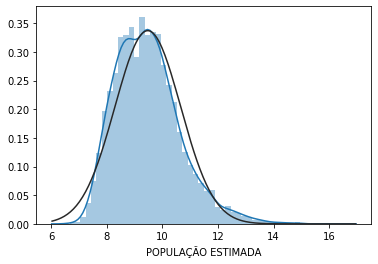

In [ ]:
sns.distplot(ibge_log, fit=norm)

Note that, in fact, the distribution seems to be slightly shifted to the left, and only one of its peeks matches with the reference distribution. Let's use two other methods to verify the normality of this distribution.

#### QQ Plots

It's possible to compare two distributions by looking at their quantiles. In simple terms, a QQ plot analyzes the **correlation** between the quantiles of each distribution being compared. If two data distributions are of the same kind we will have a maximum correlation, which will make the points on the graph align with the $y=x$ line.

Let's compare our distribution with the normal distribution and see the result we get. In order to do that, we will use the `probplot` method from the `scipy` library:

In [ ]:
from scipy.stats import probplot

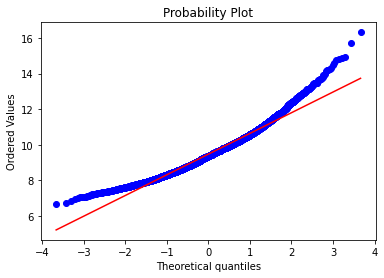

In [ ]:
probplot(ibge_log, plot=plt)
plt.show()

A small technical detail in the above code is that we need to let the method know to show its result through matplotlib (`plot=plt`).

Note that the curve shown is not perfectly aligned with the ideal line. However, let's see what would happen if we compared our data with a uniform distribution instead.

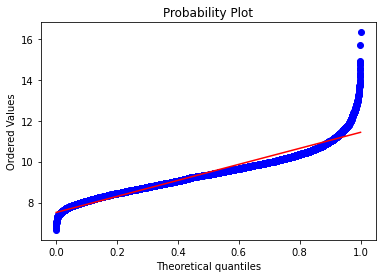

In [ ]:
probplot(ibge_log, plot=plt, dist="uniform")
plt.show()

Note that the discrepancy in regards to the reference line is even more pronounced in the extremities. Thus, we are sure that the distribution we have is closer to a normal distribution than to a uniform distribution.

#### Hypothesis testing

Another statistical tool for normality analisys are hypothesis tests.

The `scipy.stats` module has a number of tests we could use here.

For the sake of simplicity, we'll use the `normaltest` method:

In [ ]:
from scipy.stats import normaltest

In [ ]:
normaltest(ibge_log)

NormaltestResult(statistic=616.7791141813667, pvalue=1.1698147120728562e-134)

In a statistical hypothesis test, we're trying to refute a base hypothesis (known as the null hypothesis). In this case, the null hypothesis is that our data comes from a normal distribution. If we're not able to refute this hypothesis, then we accept that the available data does in fact follow a normal distribution.

In general, the result of a hypothesis test is given by a p-value, which represents the significance level of the test. A good reference for rejecting the null hypothesis is to adopt a maximum p-value of 0.05 as a threshold. So, for p-values below 0.05 we can reject the null hypothesis.

In this case, we see that our p-value was considerably lower than our threshold, which gives us confidence to reject the null hypothesis and say that the data does not follow a normal distribution.

### Common deviations in normal distributions

Being one of the most well studied distributions, there are many theoretical and practical resources available for the analysis of normal distributions. In regards to deviations from normality, the two must important concepts are **skewness** (or asymmetry, as discussed previously), and **kurtosis**.

While skewness refers to distortion to the left or right relative to the mean of the distribution, kurtosis refers to "tailedness" (i.e. high or low propensity to produce outliers). We can measure both of these using methods from the `scipy` module:

In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:
skew(ibge_log)

0.8142430680537918

In [ ]:
kurtosis(ibge_log)

1.1780282526854728

In both cases, a normal distribution should have values close to zero. We can somewhat address the skewness and kurtosis with further logarithmic transformations:


0.0703158669974756
-0.15689346402021087


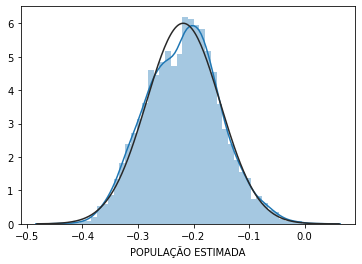

In [ ]:
ibge_4logs = np.log(np.log(np.log(ibge_log)))
print(skew(ibge_4logs))
print(kurtosis(ibge_4logs))
sns.distplot(ibge_4logs, fit=norm)

NormaltestResult(statistic=11.10104950010237, pvalue=0.003885417835225226)


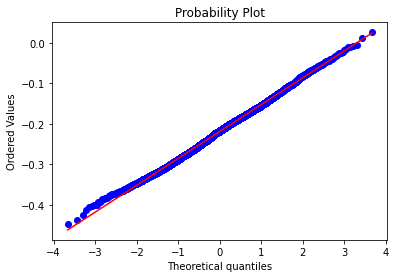

In [ ]:
print(normaltest(ibge_4logs))
probplot(ibge_4logs, plot=plt)
plt.show()

Note that, although our hypothesis test still indicates the non-normality of the distribution, our other metrics have improved considerably.

However, multiple subsequent data transformations can severely compromise data interpretation in the original domain.

Thus, the use of this kind of transformation technique should be considered carefully.